# README

Here's how you should run this notebook


* Download the dataset from this link - https://abofi-my.sharepoint.com/:f:/g/personal/naimur_rahman_abo_fi/Ep32WZErEeZBlUizW9hxA0sB6pVSn72ngoQ-E0-tvQDQEg?e=XwzWSg
* Upload "database.csv' file on colab
* Set the file_path

If you find any issue in downloading dataset or running the notebook, you may ping me on naimur.rahman@abo.fi

Here's my colab link - https://colab.research.google.com/drive/1Zi7u_Dp6-da-6Y6RutCgsiIWd9iwdFJU?usp=sharing

# Import libraries

In [1]:
import datetime
import calendar
import collections
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import networkx as nx
import community as community_louvain
import folium


from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from operator import itemgetter
from folium import plugins

# Fetch Dataset

In [2]:
import pandas as pd

# Define the file path
file_path = "database.csv"

# Read the CSV file into a DataFrame
dataframe = pd.read_csv(file_path)

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010111 entries, 0 to 1010110
Data columns (total 14 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   departure               1010111 non-null  object 
 1   return                  1010111 non-null  object 
 2   departure_id            1010111 non-null  int64  
 3   departure_name          1010111 non-null  object 
 4   return_id               1010111 non-null  float64
 5   return_name             1010111 non-null  object 
 6   distance (m)            1010111 non-null  float64
 7   duration (sec.)         1010111 non-null  float64
 8   avg_speed (km/h)        1010010 non-null  float64
 9   departure_latitude      1010111 non-null  float64
 10  departure_longitude     1010111 non-null  float64
 11  return_latitude         1010111 non-null  float64
 12  return_longitude        1010111 non-null  float64
 13  Air temperature (degC)  1010050 non-null  float64
dtypes:

In [4]:
dataframe.head()

,departure,return,departure_id,departure_name,return_id,return_name,distance (m),duration (sec.),avg_speed (km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,Air temperature (degC)
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.261397,60.195245,24.901900,60.197572,24.926781,0.9
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.099908,60.168610,24.930537,60.165017,24.949473,0.9
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.226695,60.195540,25.053581,60.187234,25.036412,0.9
3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.0,2406.0,0.185935,60.227827,24.819614,60.203474,24.898930,0.9
4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Länsisatamankatu,121.0,Vilhonvuorenkatu,7120.0,1679.0,0.254437,60.158928,24.909692,60.186463,24.967872,0.9


In [5]:
# convert from object to  datetime64

dataframe[['departure','return']] =  dataframe[['departure','return']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S.%f')



In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010111 entries, 0 to 1010110
Data columns (total 14 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   departure               1010111 non-null  datetime64[ns]
 1   return                  1010111 non-null  datetime64[ns]
 2   departure_id            1010111 non-null  int64         
 3   departure_name          1010111 non-null  object        
 4   return_id               1010111 non-null  float64       
 5   return_name             1010111 non-null  object        
 6   distance (m)            1010111 non-null  float64       
 7   duration (sec.)         1010111 non-null  float64       
 8   avg_speed (km/h)        1010010 non-null  float64       
 9   departure_latitude      1010111 non-null  float64       
 10  departure_longitude     1010111 non-null  float64       
 11  return_latitude         1010111 non-null  float64       
 12  return_longitu

In [7]:
dataframe = dataframe.rename(columns={'distance (m)': 'distance',
                                     'duration (sec.)': 'duration',
                                     'avg_speed (km/h)':'speed',
                                      'Air temperature (degC)':'temperature',
                                     })

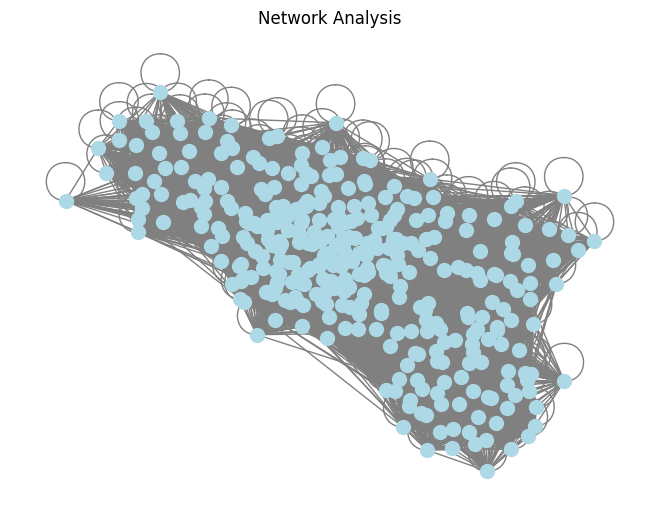

Number of nodes: 346
Number of edges: 26452
Node degree:
Haukilahdenkatu: 297
Laajalahden aukio: 252
Huopalahdentie: 252
Paciuksenkaari: 251
Itämerentori: 248
Munkkiniemen aukio: 245
Töölöntulli: 243
Tilkanvierto: 242
Ympyrätalo: 242
Linnanmäki: 240
Kalasatama (M): 238
Paciuksenkatu: 237
Sörnäinen (M): 237
Brahen kenttä: 236
Fleminginkatu: 236
Seurasaari: 234
Lauttasaaren ostoskeskus: 234
Pasilan asema: 233
Jäähalli: 232
Kuusitie: 231
Korjaamo: 229
Saunalahdentie: 229
Ratapihantie: 229
Eteläinen Hesperiankatu: 228
Messeniuksenkatu: 228
Esterinportti: 226
Vilhonvuorenkatu: 226
Hakaniemi (M): 226
Ooppera: 226
Meilahden sairaala: 225
Venttiilikuja: 224
Tenholantie: 224
Gebhardinaukio: 224
Näkinsilta: 223
Lehtisaarentie: 223
Brahen puistikko: 222
Vihdintie: 222
Nordenskiöldinaukio: 221
Varsapuistikko: 221
Töölönlahdenkatu: 221
Rautatientori / itä: 219
Rautatientori / länsi: 219
Arabian kauppakeskus: 219
Koskelantie: 218
Olympiastadion: 218
Stenbäckinkatu: 218
Arabiankatu: 218
Kustaankatu: 

In [8]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.from_pandas_edgelist(dataframe, 'departure_name', 'return_name')

# Create a layout for the nodes (you can use different layouts if desired)
layout = nx.spring_layout(G)

# Draw the network with nodes represented as bullets (dots)
nx.draw(G, pos=layout, node_size=100, node_color='lightblue', edge_color='gray')
plt.title('Network Analysis')
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

# Perform basic analysis
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# More detailed metrics
degrees = dict(G.degree())
sorted_degree = sorted(degrees.items(), key=lambda x: x[1], reverse=True)
print("Node degree:")
for d in sorted_degree:
    print(f"{d[0]}: {d[1]}")


just show the coordinates

Text(0, 0.5, 'Latitude')

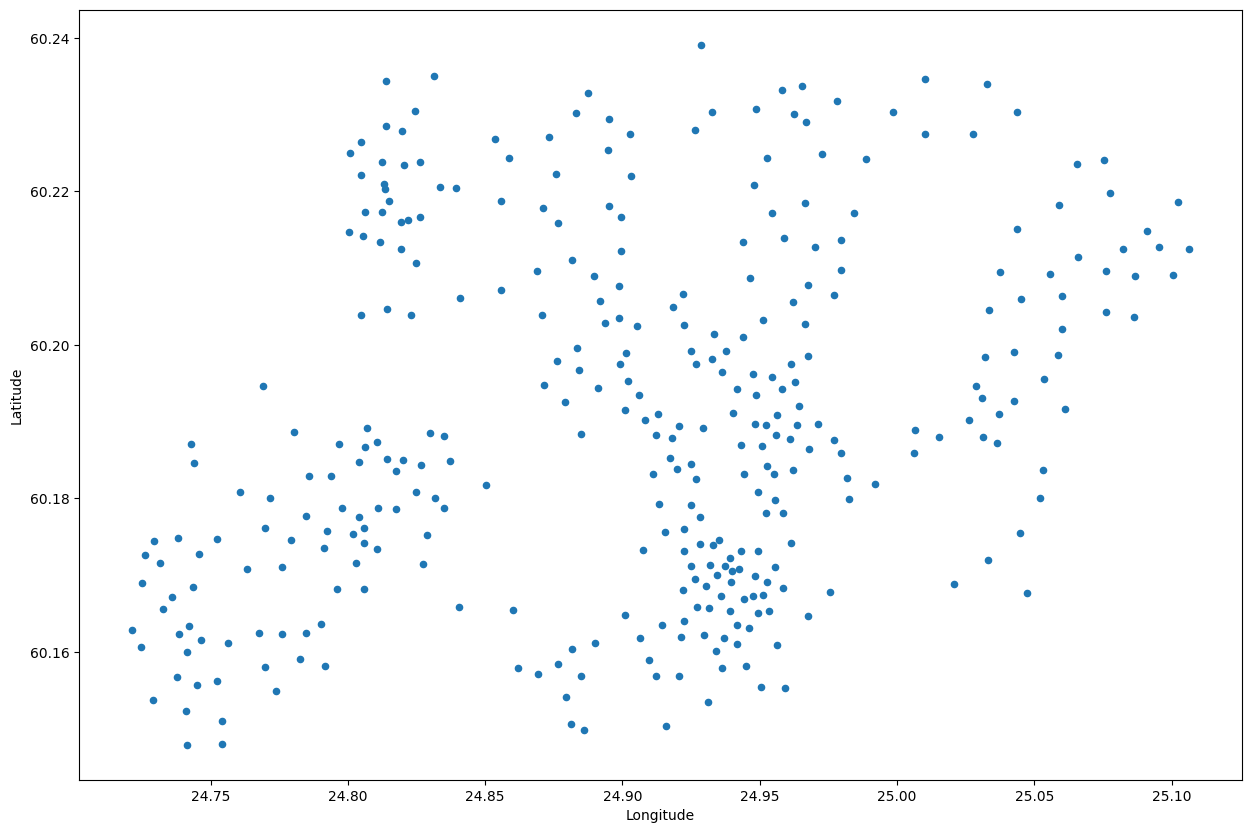

In [9]:
l_l = dataframe[['departure_latitude','departure_longitude']].drop_duplicates()
ax = l_l.plot(kind="scatter",x=['departure_longitude'],y=['departure_latitude'],figsize=(15,10))
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

In [10]:
print("The destinations departure options to choose from "+str(dataframe['departure_id'].nunique())+" and destinations to return "+str(dataframe['return_id'].nunique()))

The destinations departure options to choose from 351 and destinations to return 351


<ipython-input-11-beaabf000f58>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = heatmap_data.pivot('Day_of_Week', 'Hour', 'counts')


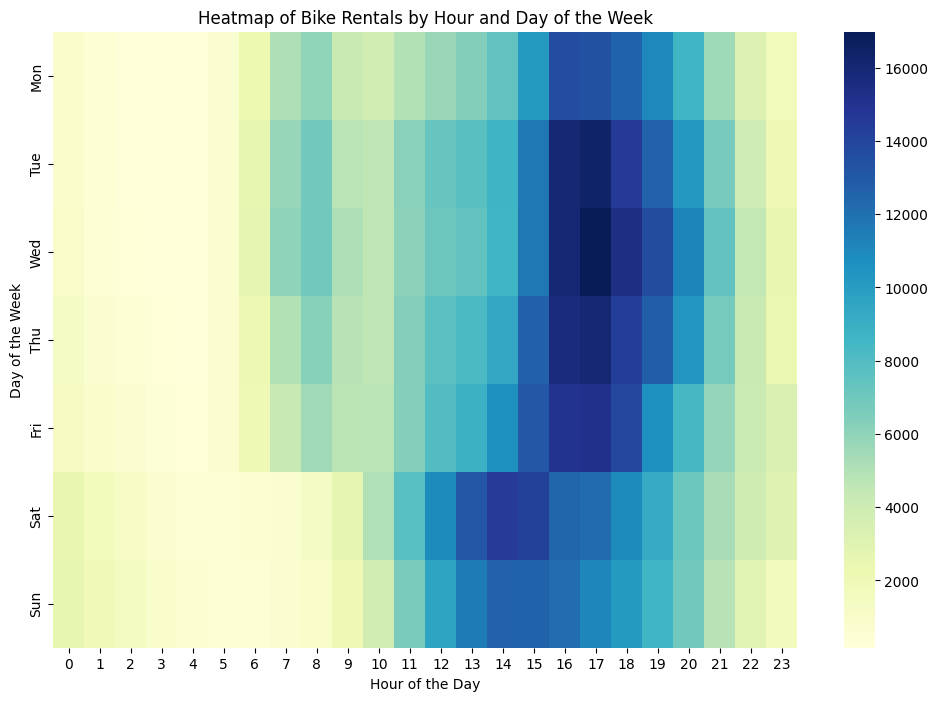

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the DataFrame is named dataframe and has a 'departure' column
# Adding an 'Hour' column to the DataFrame
dataframe['Hour'] = dataframe['departure'].dt.hour
# Adding a 'Day_of_Week' column to the DataFrame (0 = Monday, 6 = Sunday)
dataframe['Day_of_Week'] = dataframe['departure'].dt.dayofweek

# Creating a pivot table with counts of bike rentals for each hour and day
heatmap_data = dataframe.groupby(['Day_of_Week', 'Hour']).size().reset_index(name='counts')
pivot_table = heatmap_data.pivot('Day_of_Week', 'Hour', 'counts')

# Creating the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap="YlGnBu")
plt.title('Heatmap of Bike Rentals by Hour and Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.yticks(ticks=np.arange(0.5, len(pivot_table.index), 1), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


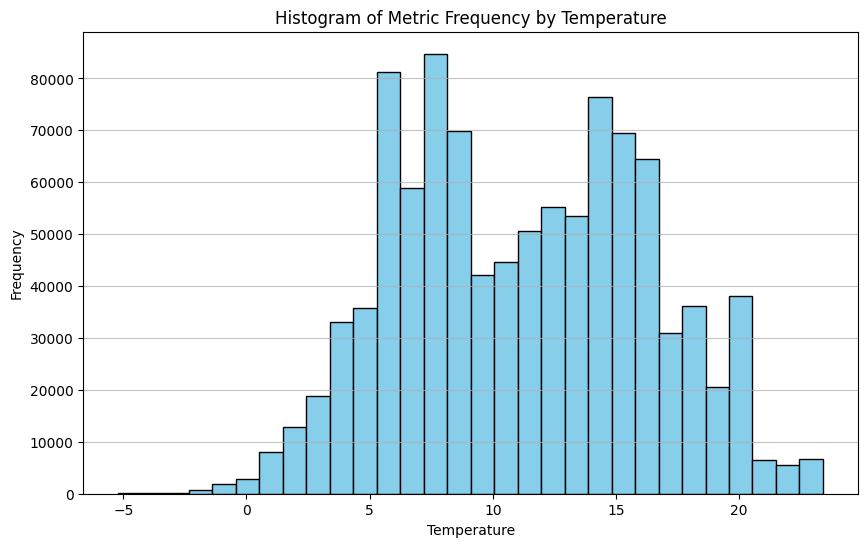

In [12]:
import matplotlib.pyplot as plt

# Assuming 'dataframe' has a column named 'temperature'
plt.figure(figsize=(10, 6))
plt.hist(dataframe['temperature'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Metric Frequency by Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


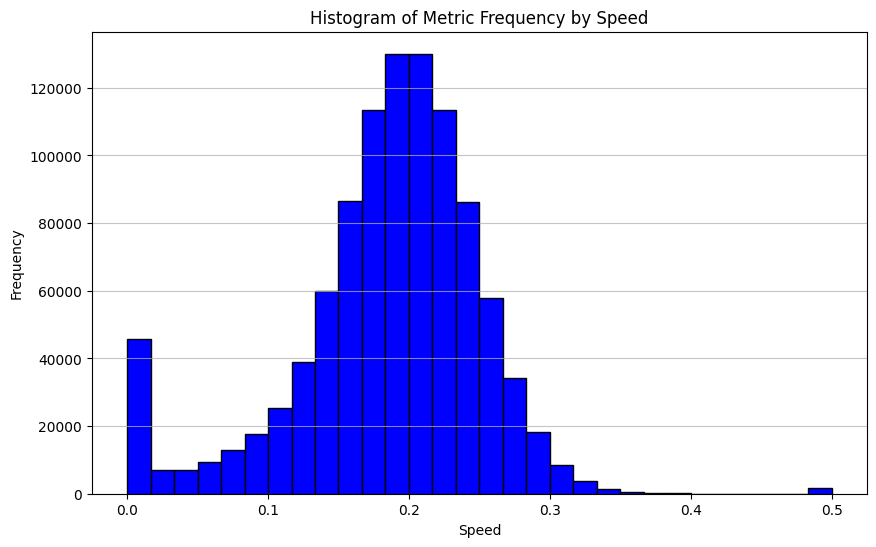

In [13]:
import matplotlib.pyplot as plt

# Assuming 'dataframe' has a column named 'speed'
plt.figure(figsize=(10, 6))
plt.hist(dataframe['speed'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Metric Frequency by Speed')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


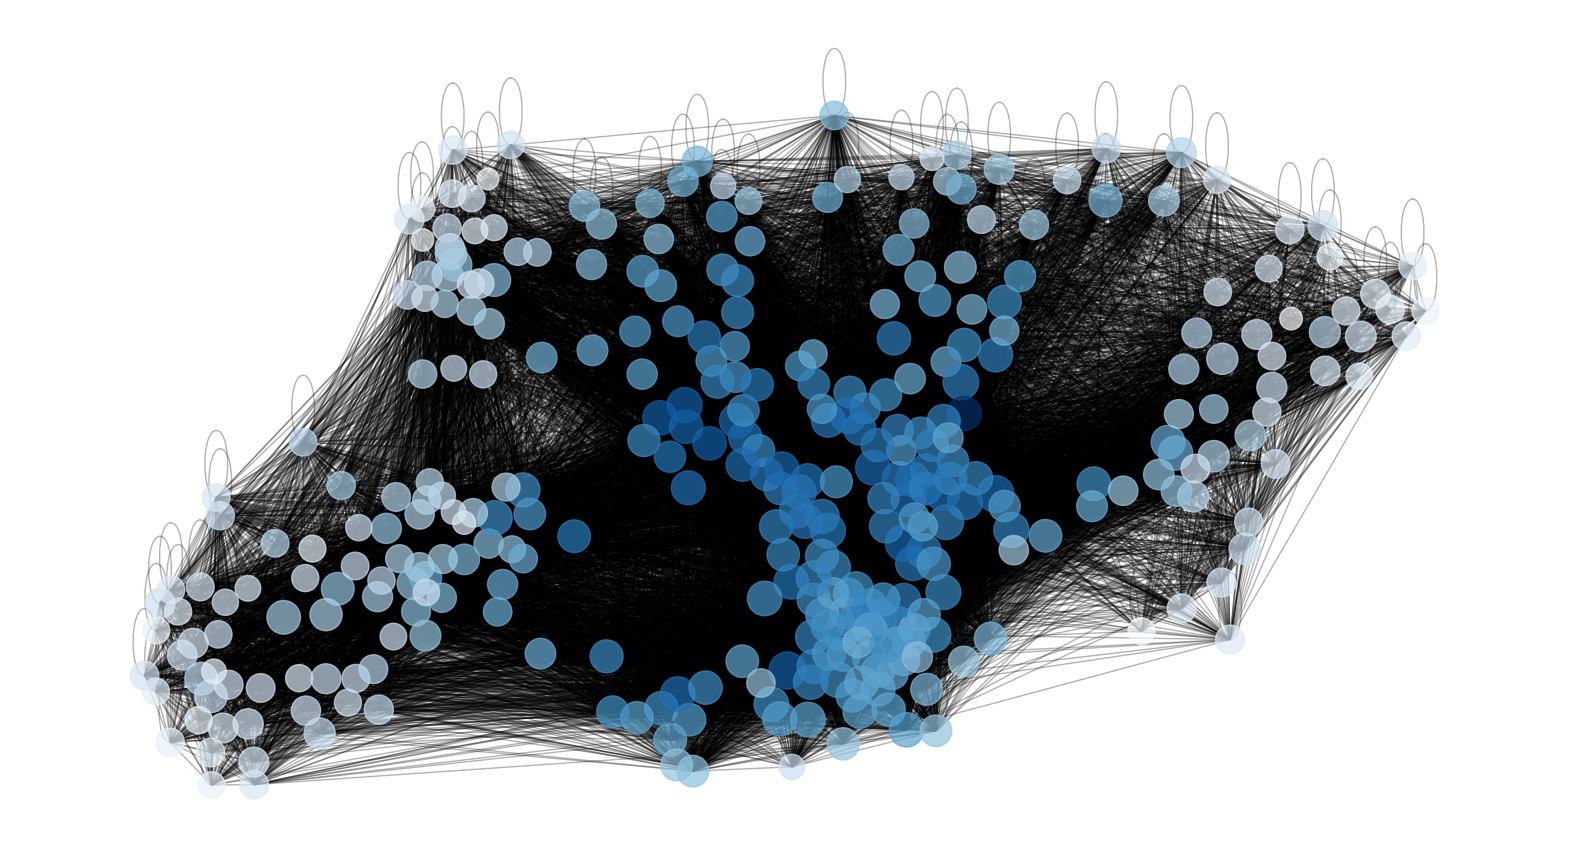

In [14]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def bikeNetwork(dataframe):
    """
    This function plots the City bike network with node sizes illustrating station popularity.
    """
    # Data
    df = dataframe.copy()
    df['departure'] = pd.to_datetime(df['departure'])  # Ensure 'departure' is datetime
    df = df[df['departure'].dt.year == 2020]  # Update year if necessary
    df.dropna(inplace=True)

    # Graphs
    G = nx.Graph()
    G = nx.from_pandas_edgelist(df, 'departure_name', 'return_name', edge_attr=['duration','distance'])

    # Figure
    fig, ax = plt.subplots(figsize=(20, 11))

    # Positions
    stations = pd.read_csv("https://raw.githubusercontent.com/Geometrein/helsinki-city-bikes/main/data/downloaded_data/station_coordinates.csv")
    stations.set_index('name', inplace=True)
    stations["pos"] = list(zip(stations["longitude"].astype(float), stations["latitude"].astype(float)))
    pos = stations.to_dict()['pos']

    # Map "pos" attribute to nodes from pos dict
    for node in G.nodes():
        G.nodes[node]['pos'] = pos.get(node, (0, 0))  # Use a default position if not found

    # Node colors based on degree of connectivity
    node_degrees = dict(G.degree())
    max_degree = max(node_degrees.values())
    min_degree = min(node_degrees.values())
    node_colors = [(node_degrees[node] - min_degree) / (max_degree - min_degree) for node in G.nodes()]

    # Node sizes based on the logarithm of the popularity
    node_sizes = [df['departure_name'].value_counts().get(node, 0) / 15 for node in G.nodes()]
    node_sizes = [100 * np.log(size + 1) for size in node_sizes]  # Add 1 to avoid log(0)

    # Draw nodes and edges
    nx.draw_networkx_nodes(G=G, pos={node: G.nodes[node]['pos'] for node in G.nodes()},
                           node_color=node_colors, cmap=plt.cm.Blues, alpha=0.7, node_size=node_sizes)
    nx.draw_networkx_edges(G=G, pos={node: G.nodes[node]['pos'] for node in G.nodes()},
                           edge_color='black', style="solid", alpha=0.3, arrows=False)
    ax.axis('off')

    plt.show()
    return G

# Assuming 'dataframe' is your dataframe variable with the correct structure and data
G = bikeNetwork(dataframe)


Number of nodes: 346
Number of edges: 26451
Average degree: 152.89595375722544
Network density: 0.44317667755717516
Triadic closure: 0.7077773088113797

Top nodes by degree:

('Haukilahdenkatu', 297)
('Laajalahden aukio', 252)
('Huopalahdentie', 252)
('Paciuksenkaari', 251)
('Itämerentori', 248)


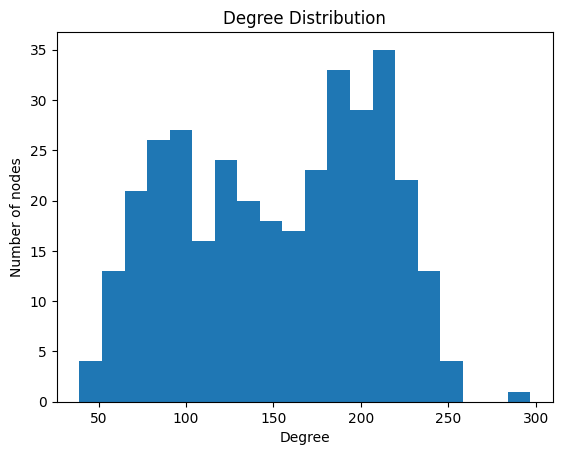


Top nodes by betweenness centrality:

('Haukilahdenkatu', 0.03176485528624838)
('Itämerentori', 0.008239365232474859)
('Lauttasaaren ostoskeskus', 0.007311813018723384)
('Huopalahdentie', 0.006811708611141061)
('Paciuksenkaari', 0.006295270393479295)


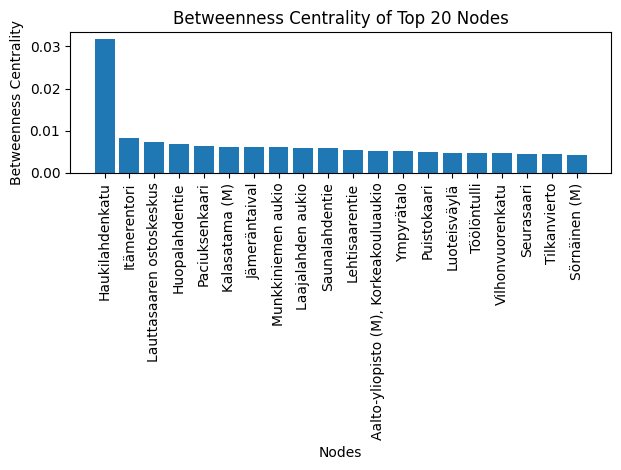


Top nodes by eigenvector centrality:

('Haukilahdenkatu', 0.08605213830638928)
('Linnanmäki', 0.08137032877907001)
('Töölöntulli', 0.08130107724827472)
('Ympyrätalo', 0.080830526189734)
('Laajalahden aukio', 0.08068675450331561)


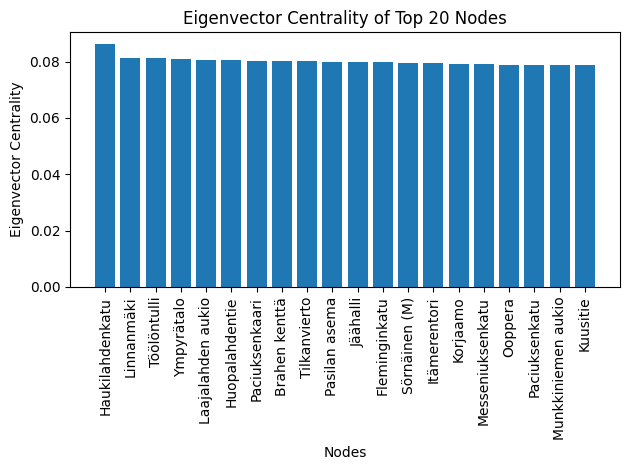

In [15]:
import networkx as nx
from operator import itemgetter
import matplotlib.pyplot as plt

def networkStats(G):
    """
    This function prints and plots the basic properties of the City bike network.
    """
    if not G:
        print("The graph is empty")
        return

    print('Number of nodes:', len(G.nodes))
    print('Number of edges:', len(G.edges))

    if len(G.nodes) == 0:
        print("No nodes in the graph.")
        return

    # Average Degree
    average_degree = sum(dict(G.degree).values()) / len(G.nodes)
    print('Average degree:', average_degree)

    # Density
    density = nx.density(G)
    print("Network density:", density)

    # Triadic Closure
    if nx.is_connected(G):
        triadic_closure = nx.transitivity(G)
        print("Triadic closure:", triadic_closure)
    else:
        print("Network is not connected. Triadic closure is not applicable.")

    # Degree Distribution
    degree_dict = dict(G.degree(G.nodes()))
    nx.set_node_attributes(G, degree_dict, 'degree')

    sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
    print("\nTop nodes by degree:\n")
    for d in sorted_degree[:min(5, len(sorted_degree))]:
        print(d)

    # Plotting the degree distribution
    plt.figure()
    plt.hist(list(degree_dict.values()), bins=20)
    plt.title('Degree Distribution')
    plt.xlabel('Degree')
    plt.ylabel('Number of nodes')
    plt.show()

    # Betweenness Centrality
    betweenness_dict = nx.betweenness_centrality(G)
    sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

    print("\nTop nodes by betweenness centrality:\n")
    for b in sorted_betweenness[:min(5, len(sorted_betweenness))]:
        print(b)

    # Plotting betweenness centrality distribution
    plt.figure()
    nodes, centrality = zip(*sorted_betweenness[:20])
    plt.bar(nodes, centrality)
    plt.title('Betweenness Centrality of Top 20 Nodes')
    plt.xlabel('Nodes')
    plt.ylabel('Betweenness Centrality')
    plt.xticks(rotation=90, ha='center')  # Rotate the node labels vertically.
    plt.tight_layout()  # Adjust layout to prevent clipping of label
    plt.show()

    # Eigenvector Centrality
    eigenvector_dict = nx.eigenvector_centrality(G)
    sorted_eigenvector = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)

    print("\nTop nodes by eigenvector centrality:\n")
    for e in sorted_eigenvector[:min(5, len(sorted_eigenvector))]:
        print(e)

    # Plotting eigenvector centrality distribution
    plt.figure()
    nodes, centrality = zip(*sorted_eigenvector[:20])
    plt.bar(nodes, centrality)
    plt.title('Eigenvector Centrality of Top 20 Nodes')
    plt.xlabel('Nodes')
    plt.ylabel('Eigenvector Centrality')
    plt.xticks(rotation=90, ha='center')  # Rotate the node labels vertically.
    plt.tight_layout()  # Adjust layout to prevent clipping of label
    plt.show()

# Example usage:
# Assuming you have a networkx graph G
networkStats(G)


In [16]:
import folium
import pandas as pd
from branca.colormap import linear

def mapPlot(dataframe, year=2020):
    """
    This function prints an interactive bubble plot by destination locations for a given year.
    """
    # Data Preparation
    df = dataframe[dataframe['departure'].dt.year == year]
    df.dropna(subset=['departure_name'], inplace=True)
    df['freq'] = df.groupby('departure_name')['departure_name'].transform('count')
    df = df[['departure_name', 'freq']].drop_duplicates()

    # Mapping frequencies to station names
    freq_dict = dict(zip(df.departure_name, df.freq))

    # Station Coordinates
    df_stations = pd.read_csv("https://raw.githubusercontent.com/Geometrein/helsinki-city-bikes/main/data/downloaded_data/station_coordinates.csv")
    df_stations = df_stations[df_stations["latitude"]<=60.254011]
    df_stations['freq'] = df_stations['name'].map(freq_dict)
    df_stations['freq_adj'] = df_stations['freq'] / (df_stations['freq'].median() / 3)
    df_stations.fillna(1, inplace=True)

    # Color Map based on frequency
    colormap = linear.YlOrRd_09.scale(df_stations['freq'].min(), df_stations['freq'].max())

    # Map Creation
    hel_map = folium.Map(location=[60.1975594, 24.9320720], zoom_start=12, tiles='cartodbdark_matter')

    # Adding Markers
    for index, row in df_stations.iterrows():
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=row["freq_adj"],  # Adjusted frequency for radius
            popup='{}<br>Frequency: {}'.format(row['name'], row['freq']),  # Popup text
            color=colormap(row['freq']),  # Color based on frequency
            fill=True,
            fill_color=colormap(row['freq']),
            fill_opacity=0.7
        ).add_to(hel_map)

    # Adding Color Map to the Map
    colormap.caption = "Station Usage Frequency"
    colormap.add_to(hel_map)

    # Display Map
    display(hel_map)

# Assuming dataframe is defined and contains the appropriate data
mapPlot(dataframe, year=2020)


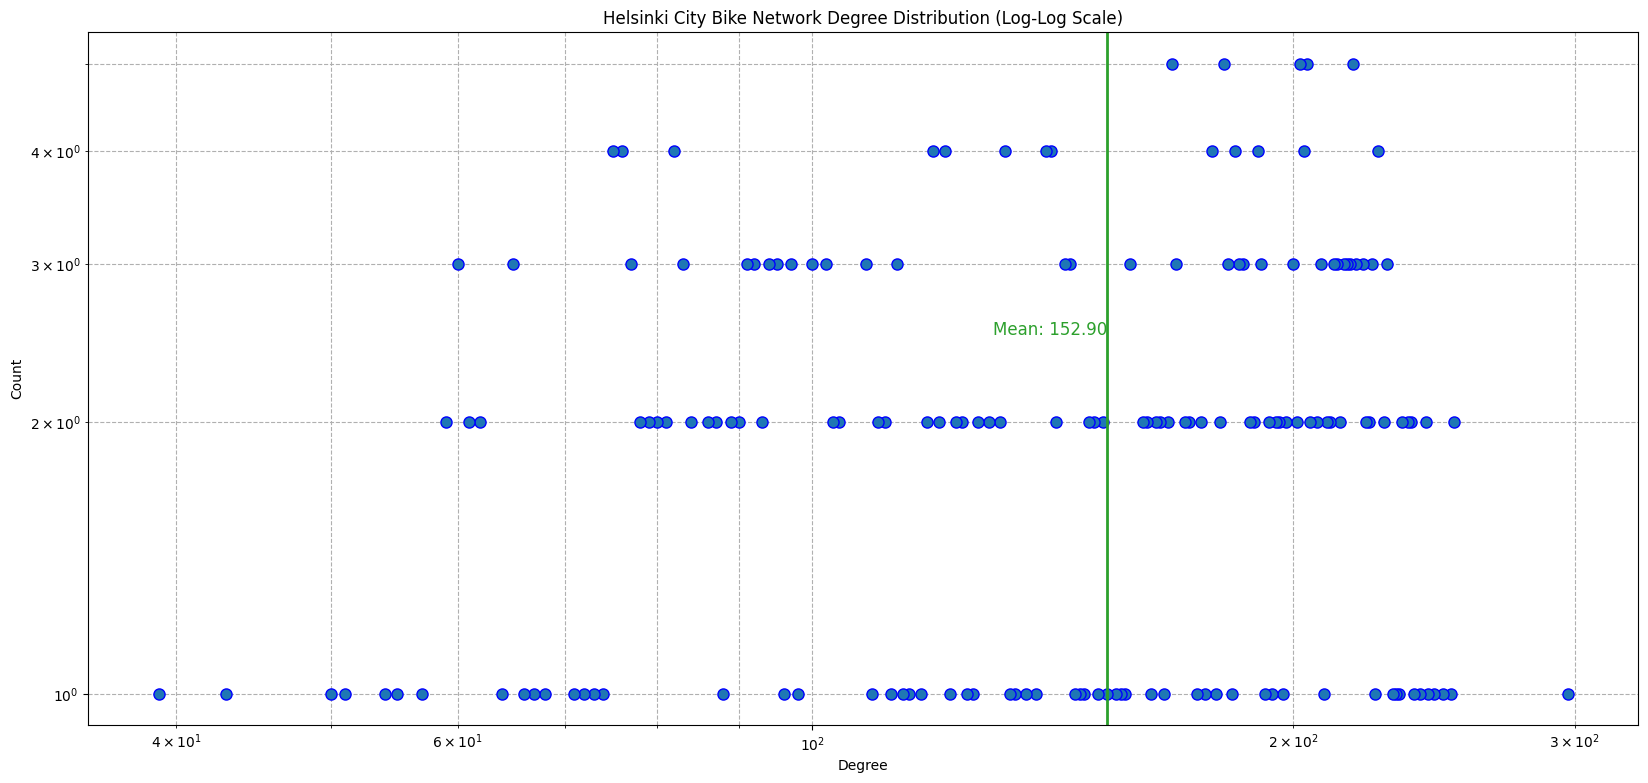

Network Insights:
- The average degree of the network is 152.90.
- If the plot shows a straight-line behavior, it suggests a power-law distribution characteristic of scale-free networks.
- The most connected nodes (hubs) have higher degrees and are critical for the network's robustness and efficiency.


In [17]:
import matplotlib.pyplot as plt
import networkx as nx
import collections
import numpy as np

# Define colors for the plot
BLUE = "#1f77b4"
GREEN = "#2ca02c"

def centralityDegreeDist(G):
    """
    Plots and analyzes the degree distribution of the network on a log-log scale.
    The plot includes a vertical line indicating the average degree.
    """
    # Calculate degree sequence and counts
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    # Convert to numpy arrays for easier manipulation
    deg = np.array(deg, dtype=float)
    cnt = np.array(cnt, dtype=float)

    # Create log-log plot
    fig, ax = plt.subplots(figsize=(20,9))
    plt.plot(deg, cnt, 'bo', markersize=8, markerfacecolor=BLUE)  # Use 'bo' for blue dot markers
    plt.xscale('log')
    plt.yscale('log')

    # Plot the average degree line
    avg_degree = sum(deg * cnt) / sum(cnt)  # Weighted average
    plt.axvline(x=avg_degree, color=GREEN, linestyle='-', linewidth=2) # Degree Mean

    # Label the average degree line
    plt.text(x=avg_degree, y=max(cnt)/2, s=f"Mean: {avg_degree:.2f}", color=GREEN, fontsize=12, ha='right')

    # Labeling Axes
    plt.title("Helsinki City Bike Network Degree Distribution (Log-Log Scale)")
    plt.ylabel("Count")
    plt.xlabel("Degree")

    # Improve plot appearance
    ax.grid(True, which="both", ls="--")  # Add grid lines for better readability

    plt.show()

    # Insight printouts
    print(f"Network Insights:")
    print(f"- The average degree of the network is {avg_degree:.2f}.")
    print(f"- If the plot shows a straight-line behavior, it suggests a power-law distribution characteristic of scale-free networks.")
    print(f"- The most connected nodes (hubs) have higher degrees and are critical for the network's robustness and efficiency.")

# Assuming G is your network graph
centralityDegreeDist(G)


In [18]:
def print_places_with_degrees(G):
    """
    This function prints each node in the graph along with its degree,
    which represents the number of connections it has to other nodes.
    """
    for node in G.nodes(data=True):
        node_name = node[0]
        node_degree = G.degree(node_name)
        print(f"Place: {node_name}, Number of Connections: {node_degree}")

# Assuming G is your network graph
print_places_with_degrees(G)


Place: Kuusitie, Number of Connections: 231
Place: Esterinportti, Number of Connections: 226
Place: Kamppi (M), Number of Connections: 216
Place: Kasarmitori, Number of Connections: 169
Place: Porolahden koulu, Number of Connections: 117
Place: Agnetankuja, Number of Connections: 109
Place: Vallipolku, Number of Connections: 77
Place: Korppaanmäentie, Number of Connections: 195
Place: Länsisatamankatu, Number of Connections: 203
Place: Vilhonvuorenkatu, Number of Connections: 226
Place: Radiokatu, Number of Connections: 193
Place: Porthania, Number of Connections: 193
Place: Tyynenmerenkatu, Number of Connections: 180
Place: Hietalahdentori, Number of Connections: 201
Place: Itämerentori, Number of Connections: 248
Place: Meilahden sairaala, Number of Connections: 225
Place: Koskelantie, Number of Connections: 218
Place: Kalasatama (M), Number of Connections: 238
Place: Rautatieläisenkatu, Number of Connections: 209
Place: A.I. Virtasen aukio, Number of Connections: 171
Place: Töölönka

Node with highest betweenness centrality: Itämerentori
Highest betweenness centrality value: 0.009708993858727975


<ipython-input-19-4cd7f2ee237f>:32: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


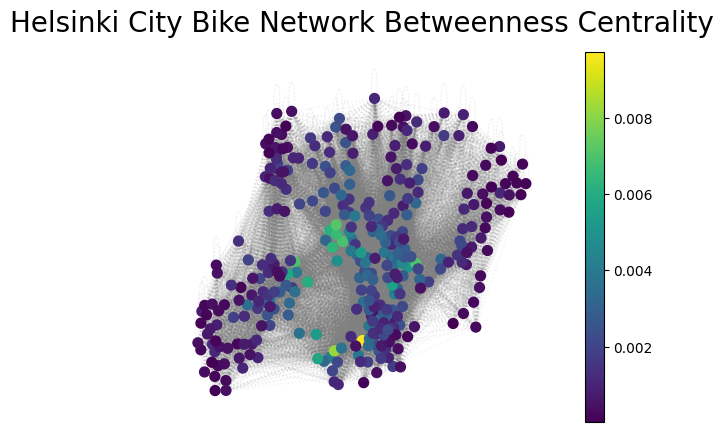

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

def centralityBetweenness(Graph):
    """
    This function calculates and plots the betweenness centrality of the city bike network.
    Additionally, it prints the node with the highest betweenness centrality and its value.
    """

    G = Graph.copy(as_view=False)
    G.remove_node("Haukilahdenkatu")

    # Calculate betweenness centrality
    betweenness = nx.betweenness_centrality(G)
    # Find the node with the highest betweenness centrality
    max_node = max(betweenness, key=betweenness.get)
    max_centrality = betweenness[max_node]

    print(f"Node with highest betweenness centrality: {max_node}")
    print(f"Highest betweenness centrality value: {max_centrality}")

    # Prepare node color mapping
    node_color = [betweenness[v] for v in G.nodes()]

    # Color scale
    cmap = plt.cm.viridis
    vmin = min(node_color)
    vmax = max(node_color)  # Consider using max(node_color) directly

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm.set_array([])  # Set the array for the ScalarMappable
    cbar = plt.colorbar(sm)

    # Draw the nodes and edges
    pos = nx.get_node_attributes(G, 'pos')
    nx.draw_networkx_nodes(G, pos=pos, node_color=node_color, cmap=cmap, alpha=1, node_size=50)
    nx.draw_networkx_edges(G, pos=pos, edge_color='grey', style="dotted", alpha=0.1, arrows=False)

    # Labeling Axes
    plt.title('Helsinki City Bike Network Betweenness Centrality', fontsize=20, pad=15)
    plt.axis('off')



# Assuming G is your network graph with positions set for nodes as 'pos'
centralityBetweenness(G)
